In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df = pd.read_csv("../input/csgo-round-winner-classification/csgo_round_snapshots.csv")
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [89]:
df.shape

(122410, 97)

In [90]:
df['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [91]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [93]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [94]:
df.describe(include='O')

,map,round_winner
count,122410,122410
unique,8,2
top,de_inferno,T
freq,23811,62406


In [95]:
df['bomb_planted'].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

In [96]:
Bomb = pd.get_dummies(df['bomb_planted'],drop_first=True)

In [97]:
df = pd.concat([df,Bomb],axis=1)

In [98]:
df['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [99]:
Nmap = pd.get_dummies(df['map'],drop_first=True)

In [100]:
df = pd.concat([df,Nmap],axis=1)

In [101]:
df.drop(['bomb_planted','map'],axis=1,inplace=True)

In [102]:
df.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,t_grenade_decoygrenade,round_winner,True,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0.0,CT,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0.0,CT,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,CT,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,CT,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0.0,CT,0,1,0,0,0,0,0,0


In [103]:
df['round_winner'] = pd.get_dummies(df['round_winner'])

In [104]:
df['round_winner'].value_counts()

0    62406
1    60004
Name: round_winner, dtype: int64

In [105]:
df.columns

Index([             'time_left',               'ct_score',
                      't_score',              'ct_health',
                     't_health',               'ct_armor',
                      't_armor',               'ct_money',
                      't_money',             'ct_helmets',
       ...
       't_grenade_decoygrenade',           'round_winner',
                           True,               'de_dust2',
                   'de_inferno',              'de_mirage',
                      'de_nuke',            'de_overpass',
                     'de_train',             'de_vertigo'],
      dtype='object', length=103)

<AxesSubplot:ylabel='t_armor'>

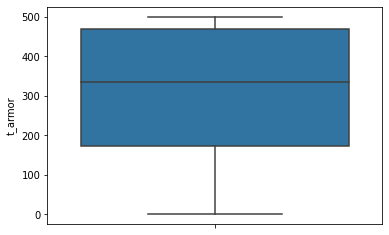

In [106]:
sns.boxplot(y=df['t_armor'])

In [107]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [108]:
X = df.drop('round_winner',axis=1)
y = df['round_winner']

In [114]:
X.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,True,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0


In [115]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: round_winner, dtype: uint8

In [117]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [118]:
feature_sel_mode = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_mode.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [120]:
feature_sel_mode.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False])

In [122]:
selected_feat = X.columns[(feature_sel_mode.get_support())]


print("Total feature",X.shape[1])
print("Selected Fetaure",len(selected_feat))
print("Feature with coefficent 0",np.sum(feature_sel_mode.estimator_.coef_ == 0))

Total feature 102
Selected Fetaure 23
Feature with coefficent 0 77


In [123]:
X[selected_feat]

,time_left,ct_score,ct_health,t_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,t_players_alive,...,ct_weapon_m4a4,t_weapon_sg553,ct_weapon_usps,ct_grenade_flashbang,t_grenade_flashbang,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade,True,de_inferno
0,175.00,0.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
1,156.03,0.0,500.0,500.0,400.0,300.0,0.0,0.0,1.0,5.0,...,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0,0
2,96.03,0.0,391.0,400.0,294.0,200.0,0.0,0.0,1.0,4.0,...,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0,0
3,76.03,0.0,391.0,400.0,294.0,200.0,0.0,0.0,1.0,4.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
4,174.97,1.0,500.0,500.0,192.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,200.0,242.0,195.0,359.0,2.0,4.0,1.0,4.0,...,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,1,0
122406,174.93,11.0,500.0,500.0,95.0,175.0,1.0,2.0,1.0,5.0,...,1.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,0,0
122407,114.93,11.0,500.0,500.0,495.0,475.0,3.0,5.0,1.0,5.0,...,1.0,1.0,1.0,4.0,4.0,5.0,1.0,5.0,0,0
122408,94.93,11.0,500.0,500.0,495.0,475.0,3.0,5.0,1.0,5.0,...,1.0,2.0,1.0,1.0,5.0,3.0,0.0,4.0,0,0


In [124]:
X[selected_feat].shape

(122410, 23)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [126]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [129]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
print(model.score(X_test,y_test))

0.884895024916265


In [131]:
from sklearn.metrics import confusion_matrix,classification_report

In [132]:
y_pred = model.predict(X_test)

In [133]:
print(confusion_matrix(y_test,y_pred))

[[11037  1488]
 [ 1330 10627]]


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12525
           1       0.88      0.89      0.88     11957

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



In [135]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [136]:
LR.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [137]:
print(LR.score(X_test,y_test))

0.7395229147945429


In [142]:
from sklearn.neural_network import MLPClassifier
M = MLPClassifier(verbose=True,batch_size=)

In [143]:
M.fit(X_train,y_train)

Iteration 1, loss = 6.06731346
Iteration 2, loss = 5.43637922
Iteration 3, loss = 4.95993781
Iteration 4, loss = 4.65479603
Iteration 5, loss = 4.16771053
Iteration 6, loss = 3.89542065
Iteration 7, loss = 3.65569349
Iteration 8, loss = 3.12464404
Iteration 9, loss = 3.07471198
Iteration 10, loss = 2.54599518
Iteration 11, loss = 2.27840446
Iteration 12, loss = 2.10926025
Iteration 13, loss = 1.81562591
Iteration 14, loss = 1.55420608
Iteration 15, loss = 1.44675825
Iteration 16, loss = 1.23397410
Iteration 17, loss = 1.09560193
Iteration 18, loss = 0.97280065
Iteration 19, loss = 0.88998583
Iteration 20, loss = 0.76719773
Iteration 21, loss = 0.70939508
Iteration 22, loss = 0.67310588
Iteration 23, loss = 0.66498985
Iteration 24, loss = 0.63312188
Iteration 25, loss = 0.60586698
Iteration 26, loss = 0.59449295
Iteration 27, loss = 0.56503388
Iteration 28, loss = 0.55856688
Iteration 29, loss = 0.54269239
Iteration 30, loss = 0.51820197
Iteration 31, loss = 0.50866380
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(batch_size=32, verbose=True)

In [144]:
print(M.score(X_test,y_test))

0.7374397516542767
